# Flatline exploration 

## Material: PET-G 30% Glass Fiber

## Date: 31-10-2022 16:34-16:44


In [1]:
# imports
# system related
import sys
import subprocess

# basics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from datetime import datetime, time

# ml related
import sklearn as sk
import torch
import torch.nn as nn

# import scripts and functions
from functions_old import *


print('imports succesfull')

imports succesfull


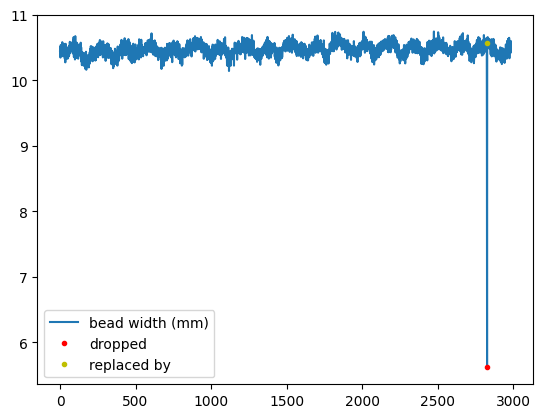

median filt ACTIVATED
import and preprocessing data succesfull


In [2]:
# Defining import variables, _s stands for small
loc_s = '../data/petg30gf_test_set_31-10_15.57-16.44.csv'
start_s = '2022-10-31 16:34:00.000'
end_s = '2022-10-31 16:44:00.000'

# import, filter, outlier replacement and median filtering on bead_width (mm)
df_s = import_csv_filt(loc_s, start_s, end_s, plot_outliers=True)

df_s_no_filt = import_csv_filt(loc_s, start_s, end_s, median_filt=False)

print('import and preprocessing data succesfull')



median value 2725 and 2825
10.4055
10.572


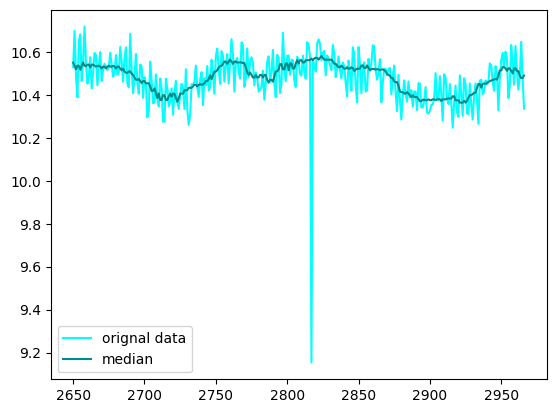

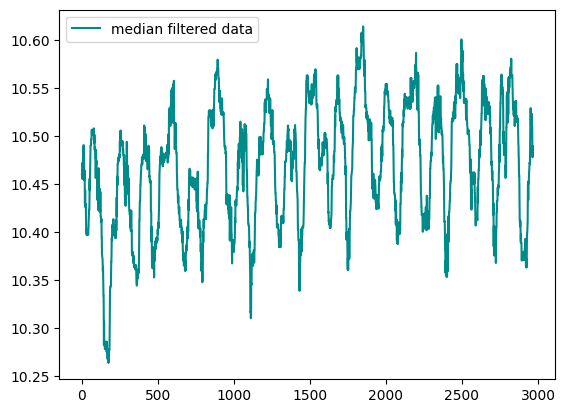

In [5]:
filter_length = 20
head_tails = int(filter_length/2)

bead_gauss = df_s['bead_width (mm)'].rolling(window=filter_length, win_type='gaussian', center=True).mean(std=5)
bead_median = df_s['bead_width (mm)'].rolling(window=filter_length, center=True).median()

print('\n\nmedian value 2725 and 2825')
print(df_s.loc[2725, 'bead_width (mm)'])
print(df_s.loc[2825, 'bead_width (mm)'])


plt.plot(df_s_no_filt.loc[2650:3000, 'bead_width (mm)'], 'cyan', label='orignal data')
plt.plot(df_s.loc[2650:3000, 'bead_width (mm)'], 'darkcyan', label='median')
plt.legend()
plt.show()

plt.plot(df_s.loc[:, 'bead_width (mm)'], 'darkcyan', label='median filtered data')
plt.legend()
plt.show()

C:\Users\ceadg\AppData\Local\Temp\ipykernel_18856\110519042.py:11: RuntimeWarning: divide by zero encountered in divide
  freq = T/n #  /T  Changed to seconds instead of hz
C:\Users\ceadg\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


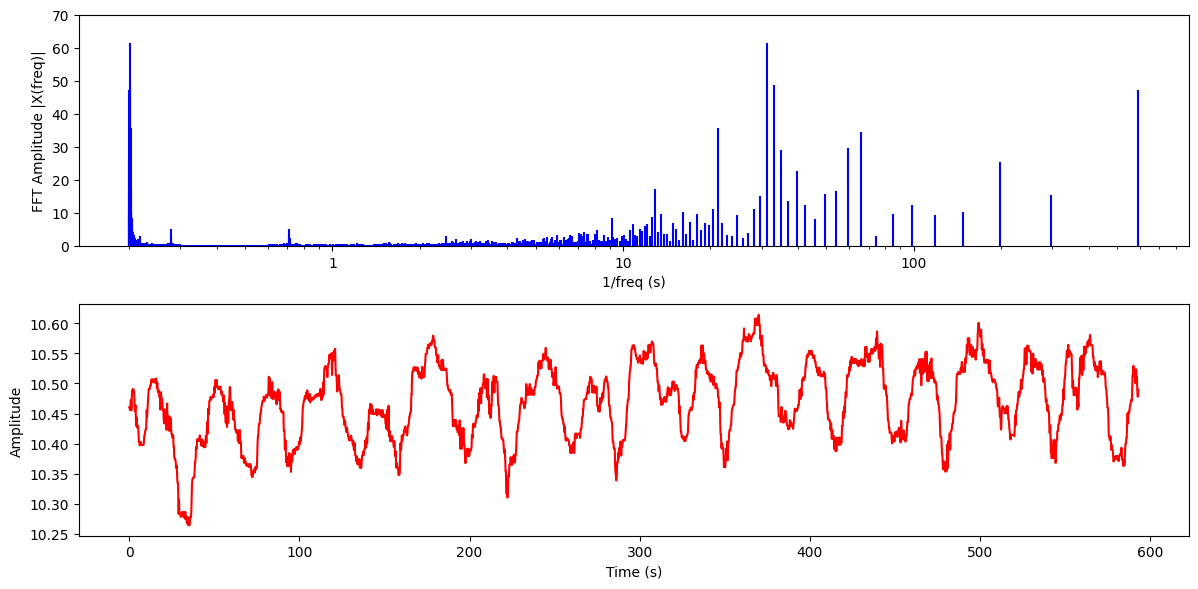

In [4]:
from numpy.fft import fft, ifft
from matplotlib.ticker import ScalarFormatter

sr = 5
ts = 1.0/sr

X = fft(df_s.loc[:, 'bead_width (mm)'])
N = len(X)
n = np.arange(N)
T = N/sr
freq = T/n #  /T  Changed to seconds instead of hz

fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(2, 1, 1)
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('1/freq (s)') # instead of plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xscale('log',base=10)
plt.ylim(0, 70)

ax.xaxis.set_major_formatter(ScalarFormatter())

t = np.arange(0,0.2*len(ifft(X)),ts)

ax = fig.add_subplot(2, 1, 2)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

#### 